In [14]:
import pybaseball as pyb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

In [17]:
data = pd.DataFrame()

for i in range(20):
    year = 2024
    stats_batting = pyb.team_batting(year-i)
    stats_batting = stats_batting[['teamIDfg', 'Season', 'Team', 'R', 'K%']]
    stats_pitching = pyb.team_pitching(year - i)
    stats_pitching = stats_pitching[['teamIDfg', 'Season', 'Team', 'W', 'L', 'R']]
    stats_pitching = stats_pitching.rename(columns = {'R': 'RA'})
    merged_data = pd.merge(stats_pitching, stats_batting, how = 'inner', on = ['teamIDfg', 'Season', 'Team'])
    merged_data['Run_Diff'] = merged_data['R'] - merged_data['RA']
    data = pd.concat([data, merged_data], ignore_index=True)


In [ ]:

data['Win_Pct'] = data['W']/162
data = data[data['Season'] != 2020]

In [20]:
model = LinearRegression()
model.fit(np.array(data['Run_Diff']).reshape(-1,1), np.array(data['Win_Pct']))
x_range = np.array(range((data['Run_Diff'].min()-10), (data['Run_Diff'].max()+10))).reshape(-1,1)
y_pred = model.predict(x_range)

In [21]:
r2 = model.score(np.array(data['Run_Diff']).reshape(-1,1), np.array(data['Win_Pct']))
r2 = round(r2,2)

Text(200, 0.3, '$R^2$ = 0.88')

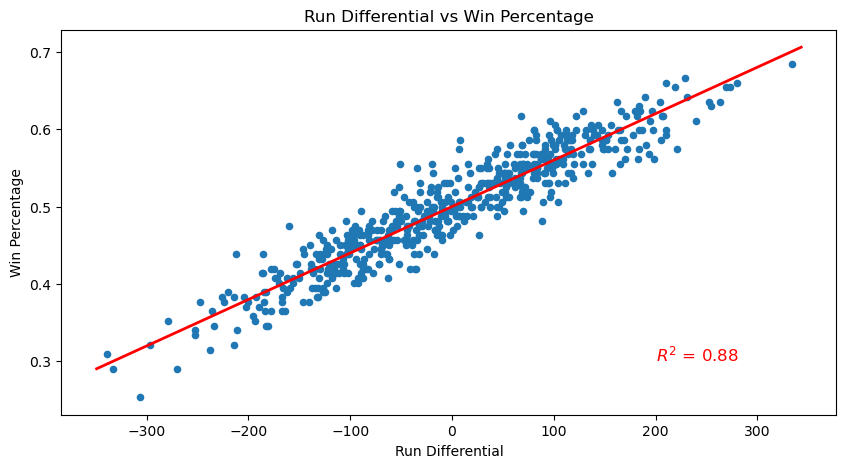

In [22]:
data.plot(kind='scatter', x='Run_Diff', y='Win_Pct', figsize=(10, 5), title='Run Differential vs Win Percentage',
          xlabel = 'Run Differential', ylabel= 'Win Percentage')
plt.plot(x_range, y_pred, color = 'red', linewidth= 2)
plt.text(200, 0.3, f'$R^2$ = {r2}', color = 'red', fontsize=12)

In [24]:
model_k = LinearRegression()
model_k.fit(np.array(data['K%']).reshape(-1,1), np.array(data['Win_Pct']))
x_range_k = np.linspace(data['K%'].min(), data['K%'].max(), 200)
y_pred_k = model_k.predict(x_range_k.reshape(-1, 1))

r2_k = model_k.score(np.array(data['K%']).reshape(-1,1), np.array(data['Win_Pct']))
r2_k = round(r2_k,2)

Text(0.14, 0.3, '$R^2$ = 0.03')

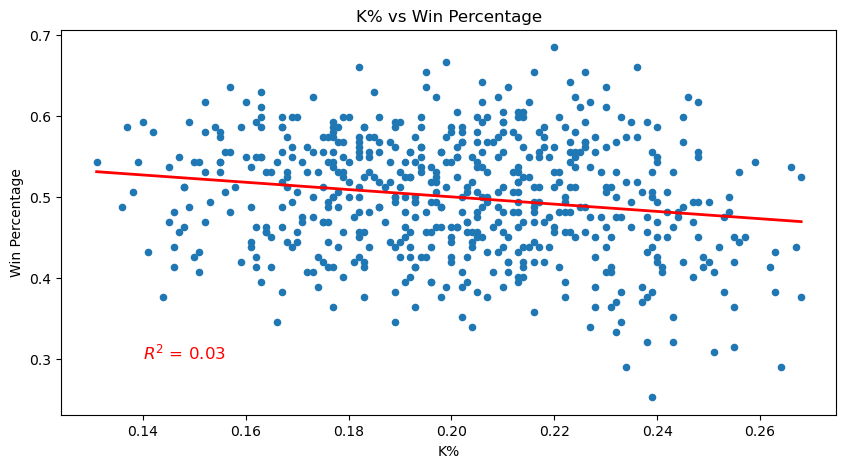

In [25]:
data.plot(kind='scatter', x='K%', y='Win_Pct', figsize=(10, 5), title='K% vs Win Percentage',
          xlabel = 'K%', ylabel= 'Win Percentage')
plt.plot(x_range_k, y_pred_k, color = 'red', linewidth= 2)
plt.text(0.14, 0.3, f'$R^2$ = {r2_k}', color = 'red', fontsize=12)

In [26]:
data_post_2020 = data[data['Season'] > 2020]

In [27]:
model_k_2 = LinearRegression()
model_k_2.fit(np.array(data_post_2020['K%']).reshape(-1,1), np.array(data_post_2020['Win_Pct']))
x_range_k_2 = np.linspace(data_post_2020['K%'].min(), data_post_2020['K%'].max(), 200)
y_pred_k_2 = model_k.predict(x_range_k_2.reshape(-1, 1))

r2_k_2 = model_k_2.score(np.array(data_post_2020['K%']).reshape(-1,1), np.array(data_post_2020['Win_Pct']))
r2_k_2 = round(r2_k_2,2)

Text(0.18, 0.3, '$R^2$ = 0.09')

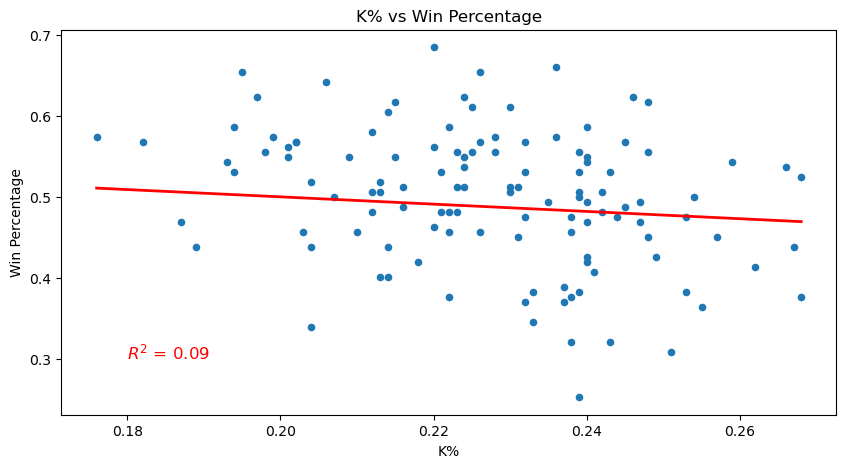

In [28]:
data_post_2020.plot(kind='scatter', x='K%', y='Win_Pct', figsize=(10, 5), title='K% vs Win Percentage',
          xlabel = 'K%', ylabel= 'Win Percentage')
plt.plot(x_range_k_2, y_pred_k_2, color = 'red', linewidth= 2)
plt.text(0.18, 0.3, f'$R^2$ = {r2_k_2}', color = 'red', fontsize=12)